<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_test = pd.read_csv("Advertising.csv")
df_test.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


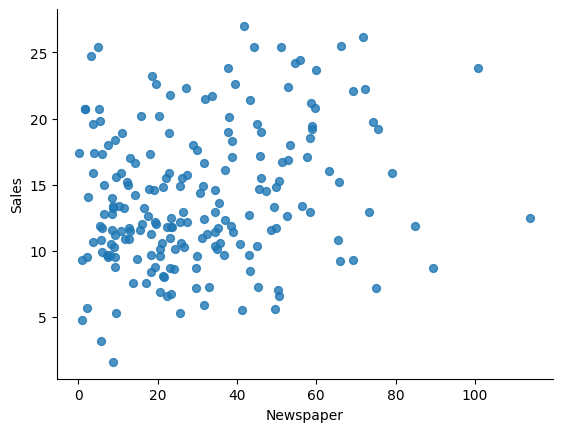

In [ ]:
# @title Newspaper vs Sales

from matplotlib import pyplot as plt
df_test.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_for_gradient = df_test[["Newspaper","Sales"]]
print(len(df_for_gradient))
df_for_gradient.head()

200


,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,9.3
3,58.5,18.5
4,58.4,12.9


**gradient descent from scratch**


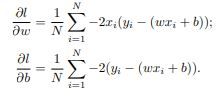

In [ ]:
def gradeint_descent_func(X, Y, w, b, alpha):
  m = len(X)
  dl_dw = 0.0
  dl_db = 0.0
  #calculate gradient
  for i in range(m):
    dl_dw += -2*X[i]*(Y[i] - (w*X[i] + b))
    dl_db += -2*(Y[i] - (w*X[i] + b))
  #update w and b
  w = w - (1/float(m))*dl_dw*alpha
    #print (w)
  b = b - (1/float(m))*dl_db*alpha
    #print(b)
  return w , b

## it just execute for one epoch
w, b = gradeint_descent_func(df_for_gradient["Newspaper"], df_for_gradient["Sales"], 0.0, 0.0, 0.001)
print(w, b)

0.9085102999999999 0.028045000000000007


In [ ]:
w_list = []
b_list = []
def avg_loss(X, Y, w, b):
  total_loss = 0.0
  for l in range(len(X)):
    total_loss +=  (Y[l] - (w*X[l]+b))**2
  return total_loss/float(len(X))

def train_algorithm(X, Y, w, b, alpha, epoch):
  for e in range(epoch):
    w, b = gradeint_descent_func(X, Y, w, b, alpha)

    ##printing every 200 epoch
    if e % 100 == 0:
      print("epoch: " ,e ,"average loss:", avg_loss(X, Y, w, b))
      w_list.append(w)
      b_list.append(b)
  return w, b, w_list, b_list
w, b , w_list, b_list= train_algorithm(df_for_gradient["Newspaper"], df_for_gradient["Sales"], 0.0, 0.0, 0.0001,600)

epoch:  0 average loss: 152.71481443139228
epoch:  100 average loss: 76.15268393436205
epoch:  200 average loss: 75.47951643530747
epoch:  300 average loss: 74.81532608562432
epoch:  400 average loss: 74.159993168881
epoch:  500 average loss: 73.51339956514643


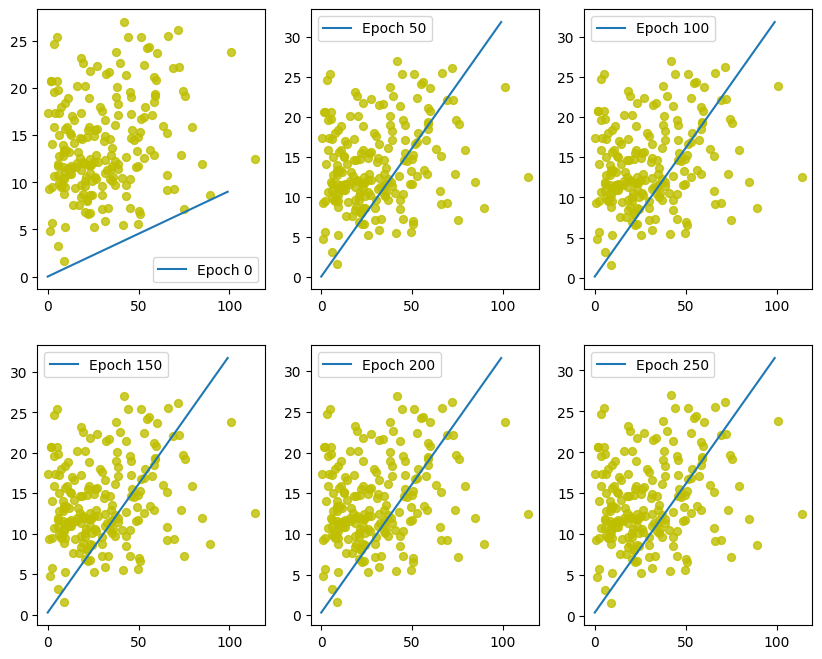

In [66]:
import matplotlib.pyplot as plt

# plot with various axes scales
plt.figure(figsize=(10, 8))

for i in range(len(w_list)):
  # Plot the data points
  plt.subplot(2,3,i+1)
  plt.scatter(df_for_gradient["Newspaper"], df_for_gradient["Sales"], s=32, alpha=0.8, c='y')

  epoch = 50*i
  x_values = range(0, 100)
  y_values = [w_list[i] * x + b_list[i] for x in x_values]
  plt.plot(x_values, y_values, label="Epoch {}".format(epoch))
  plt.legend()

plt.show()


##implement different SGD from scratch

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## one dimension sgd
def func_test(x):
  return x**2

def gradient_func(x):
  return 2*x

In [ ]:
## define gradient descent function
def gradient_descent(l_rate, gradient_func):
  x = -15
  x_vals = [x]

  for i in range(15):
    x -= l_rate * gradient_func(x)
    x_vals.append(x)

  return x_vals

In [ ]:
##plot
def plot_function(x_vals, func):
  x_line = np.arange(-20, 20, 0.1)
  plt.plot(x_line,  [func(x) for x in x_line])
  plt.plot(x_vals,  [func(x) for x in x_vals], "ro-")

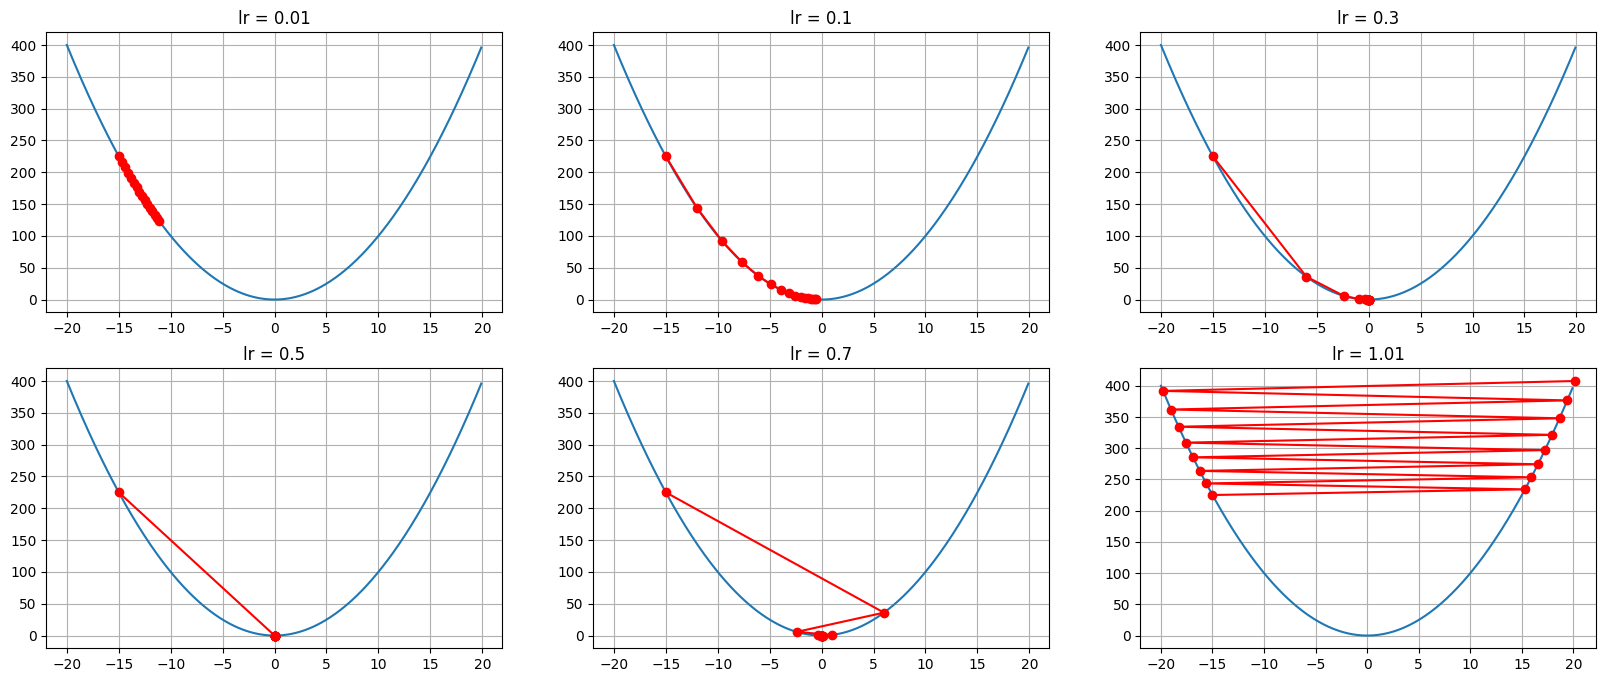

In [ ]:
# plot with various axes scales
plt.figure(figsize=(20, 8))

# lr=0.01
plt.subplot(2,3,1)
x_vals = gradient_descent(0.01, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.01')
plt.grid(True)

# lr=0.1
plt.subplot(2,3,2)
x_vals = gradient_descent(0.1, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.1')
plt.grid(True)

# lr=0.03
plt.subplot(2,3,3)
x_vals = gradient_descent(0.3, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.3')
plt.grid(True)

# lr=0.5
plt.subplot(2,3,4)
x_vals = gradient_descent(0.5, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.5')
plt.grid(True)

# lr=0.7
plt.subplot(2,3,5)
x_vals = gradient_descent(0.7, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 0.7')
plt.grid(True)

# lr=1
plt.subplot(2,3,6)
x_vals = gradient_descent(1.01, gradient_func)
plot_function(x_vals, func_test)
plt.title('lr = 1.01')
plt.grid(True)





## 2 dimension gradient


In [ ]:
def func(x1, x2):
  return x1**2 + 2*x2**2

def func_gradient(x1, x2):
  return (2*x1, 4*x2)

In [ ]:
class Optimizer:
  def __init__(self, lr_type, lr_rate=0.01):
    self.lr_type = self.lr(lr_type, lr_rate)

  def lr(self, lr_type, lr_rate):
    if lr_type  == "constant":
      return self.constant_lr(lr_rate)

  def constant_lr(self, lr_rate):
    return lr_rate

  def gradient_descent(self,x1, x2, t1, t2, func_gradient):
    grad_x1, grad_x2 = func_gradient(x1, x2)
    return x1 - self.lr_type*grad_x1 , x2 - self.lr_type*grad_x2, 0 ,0

In [ ]:
def search_opt(optimizer, func_gradient, iteration=20):
  x1, x2, t1, t2 = -5 , -2, 0, 0
  x_iteration = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_gradient)
    x_iteration.append((x1, x2))
  print("epoch{}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iteration

In [ ]:
def search_path(func, x_iteration):
  plt.plot(*zip(*x_iteration),"-o",color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch20, x1:-0.057646075230342354, x2:-7.312316880125945e-05


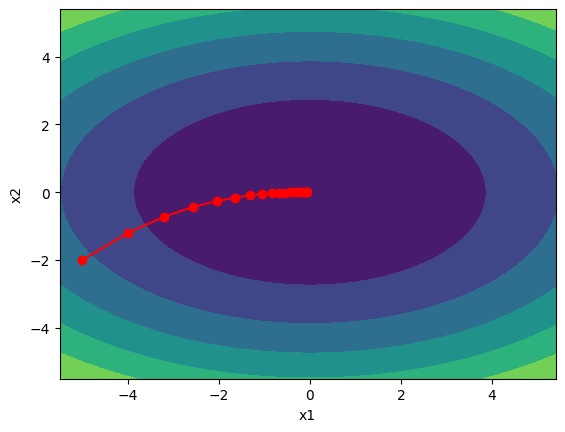

In [ ]:
opt = Optimizer("constant", 0.1)
search_path(func, search_opt(opt.gradient_descent, func_gradient))